### Pair Programming – Limpieza III

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?
2. Identifica visualmente los outliers
3. Identifica sobre el dataframe las filas que son outliers
4. Reemplaza los outliers por el estadístico más correcto.
5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("datos/attacks_pandas_8.csv", index_col = 0)

In [30]:
df.head(2)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",57.0,White Shark,25-Jun-2018,Jun,N,F,usa
1,2018.06.03.a,2018.0,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",18.0,Tiger Shark,03-Jun-2018,Jun,Y,M,brazil


In [31]:
df.shape

(7789, 13)

In [32]:
df_numericas = df.select_dtypes(include = np.number)

In [33]:
# ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?


Tenemos sólo dos columnas numéricas para extraaer los outliers, la de "edad" y la de "year". En la columna de "edad", por ejemplo, los outliers podrían modificar demasiado la media y sería conveniente, a lo mejor, quitarlos. En la columna "year" también habría que considerar eliminar los outliers de fechas muy lejanas.

In [34]:
# Identifica visualmente los outliers.

In [35]:
df_numericas.sample(3)

,year,age
6669,NaN,NaN
297,2011.0,30.0
341,2010.0,9.0


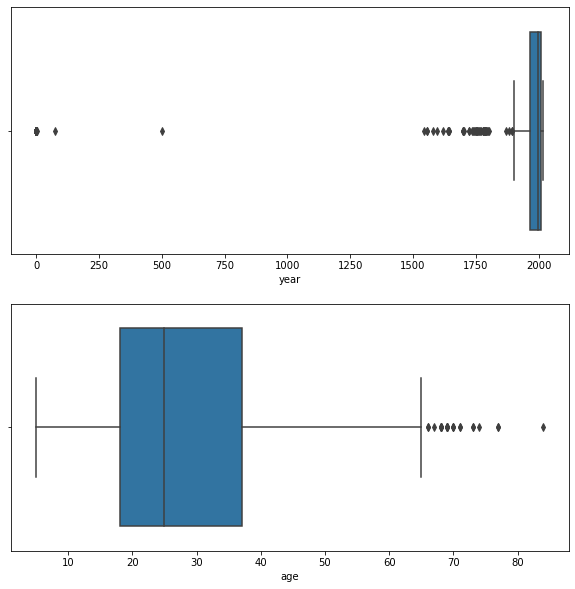

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    
plt.show() 

In [37]:
df["year"] = pd.to_numeric(df["year"])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7789 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_number         7788 non-null   object 
 1   year                1672 non-null   float64
 2   type                1672 non-null   object 
 3   country             1662 non-null   object 
 4   area                1626 non-null   object 
 5   location            1621 non-null   object 
 6   age                 1514 non-null   float64
 7   species_            7789 non-null   object 
 8   date                6286 non-null   object 
 9   mes                 5394 non-null   object 
 10  fatal_(y/n)_limpio  5678 non-null   object 
 11  sex                 7789 non-null   object 
 12  country_            1662 non-null   object 
dtypes: float64(2), object(11)
memory usage: 851.9+ KB


In [39]:
df.isnull().sum()

case_number              1
year                  6117
type                  6117
country               6127
area                  6163
location              6168
age                   6275
species_                 0
date                  1503
mes                   2395
fatal_(y/n)_limpio    2111
sex                      0
country_              6127
dtype: int64

In [40]:
# Identifica sobre el dataframe las filas que son outliers.

def detectar(lista_columnas, df):
    dict = {}
    for col in lista_columnas:
        print(col)
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
    
        if outlier_data.shape[0] > 0:
            dict[col] = list(outlier_data.index)
    
    return dict

In [41]:
#Q1 = np.nanpercentile(df["year"], 25)

In [42]:
lista_columnas = df_numericas.columns

In [43]:
outliers = detectar(lista_columnas, df_numericas)

year
age


In [44]:
valores = [ind for key, value in outliers.items() for ind in value ]

In [45]:
df_outliers = df.iloc[valores]
df_outliers.tail()

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
917,1993.09.03,1993.0,Unprovoked,spain,Costa Blanca,"Playa de las Arenas, Valencia",69.0,Unspecified,NaN,NaN,NaN,M,spain
929,1993.02.04,1993.0,Provoked,australia,Queensland,Mooloolaba,69.0,Unspecified,NaN,NaN,NaN,M,australia
1047,1985.08.17,1985.0,Invalid,usa,Florida,"Bayport, Hernando County",67.0,Unspecified,NaN,NaN,NaN,M,usa
1059,1984.10.17,1984.0,Invalid,usa,Florida,"Boynton Beach, Palm Beach County",77.0,Unspecified,NaN,NaN,NaN,F,usa
1433,1943.07.00.a,1943.0,Invalid,mexico,Veracruz,"Villa del Mar Beach, Veracruz",68.0,Unspecified,NaN,NaN,NaN,M,mexico


In [46]:
# Reemplaza los outliers por el estadístico más correcto.

<AxesSubplot:xlabel='year', ylabel='Count'>

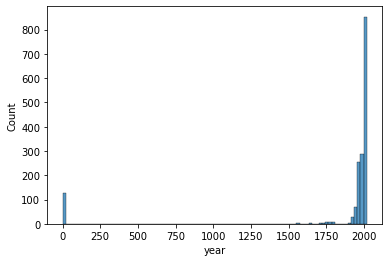

In [47]:
# Sacamos la gráficas para ver la distribución de los datos:

sns.histplot(x="year", data=df_numericas, bins=95)

<AxesSubplot:xlabel='age', ylabel='Count'>

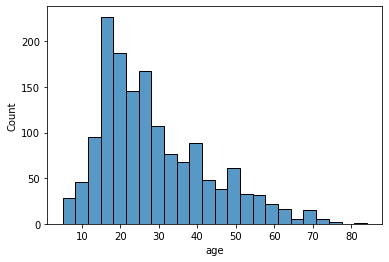

In [48]:

sns.histplot(x="age", data=df_numericas)

Llegamos a la conclusión de que la mejor idea es extraer la mediana de todos los datos:

In [55]:
for key, value in outliers.items():
    mediana = df[key].median()
    #print(mediana)
    for i in value:
        print(i)
        df.loc[i, key] = mediana

1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
12
30
51
80
84
121
139
141
184
202
229
326
329
352
433
487
559
589
668
754
769
917
929
1047
1059
1433


In [50]:
df.sample(5)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
7108,1896.06.21.R,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,Reported 21-Jun-1896,Jun,N,M,NaN
7444,1863.00.00.R4,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,1863,NaN,Y,M,NaN
6811,1915.05.15.R,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,Reported 15-May-1915,May,NaN,M,NaN
4379,1984.09.11,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,11-Sep-1984,Sep,N,M,NaN
6679,1924.02.08,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,08-Feb-1924,Feb,NaN,F,NaN


In [51]:
df.iloc[917]

case_number                               1993.09.03
year                                          1993.0
type                                      Unprovoked
country                                        spain
area                                    Costa Blanca
location              Playa de las Arenas, Valencia 
age                                             25.0
species_                                 Unspecified
date                                             NaN
mes                                              NaN
fatal_(y/n)_limpio                               NaN
sex                                                M
country_                                       spain
Name: 917, dtype: object

In [52]:
# Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente
# pair programming de limpieza.

In [53]:
df.to_csv("datos/attacks_pandas_9b.csv")